In [1]:
import pandas as pd
import numpy as np

import plotly
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 1000)
pd.options.display.max_seq_items = 2000

PATH = '/Users/antonmorozov/'

import os
import sys

print('Path of working directory  %s' % os.getcwd())
print('Path of the executable binary %s' % sys.executable)
sys.version

Path of working directory  /Users/antonmorozov/Downloads
Path of the executable binary /Users/antonmorozov/opt/anaconda3/bin/python


'3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]'

In [2]:
# [f for f in os.listdir('.') if os.path.isfile(f)]

In [3]:
df = pd.read_csv(os.path.join(PATH, 'downloads', 'S03_CGM|D15_time_exp.csv'))
df = df[['Тип данных', 'Идентификатор', 'Сложность задачи (1-10)']]
df

,Тип данных,Идентификатор,Сложность задачи (1-10)
0,Промежуточные,S03,NaN
1,Действие,CGM|M2|B7|A03,8.0
2,Промежуточные,CGM|M2|B7|D03,NaN
3,Действие,CGM|M2|B7|A04,8.0
4,Промежуточные,CGM|M2|B7|D04,NaN
5,Действие,CGM|M2|B7|A05,8.0
6,Промежуточные,CGM|M2|B7|D05,NaN
7,Действие,CGM|A14-2,8.0
8,Промежуточные,CGM|D14,NaN
9,Действие,CGM|А20,4.0


In [4]:
df['Сложность задачи (1-10)'].fillna(0.1, inplace=True)

In [5]:
df['Start'] = df['Сложность задачи (1-10)'].cumsum().shift(1).fillna(0)
df['Finish'] = df['Сложность задачи (1-10)'].cumsum()
df['Start-Finish'] = df['Finish'] - df['Start']

def color(row):
#     c_dict = {'Промежуточные':'#E64646', 'Действие':'#3475D0'}
    c_dict = {'Промежуточные':'Red', 'Действие':'Blue'}
    return c_dict[row['Тип данных']]

df['Color'] = df.apply(color, axis=1)
df

,Тип данных,Идентификатор,Сложность задачи (1-10),Start,Finish,Start-Finish,Color
0,Промежуточные,S03,0.1,0.0,0.1,0.1,Red
1,Действие,CGM|M2|B7|A03,8.0,0.1,8.1,8.0,Blue
2,Промежуточные,CGM|M2|B7|D03,0.1,8.1,8.2,0.1,Red
3,Действие,CGM|M2|B7|A04,8.0,8.2,16.2,8.0,Blue
4,Промежуточные,CGM|M2|B7|D04,0.1,16.2,16.3,0.1,Red
5,Действие,CGM|M2|B7|A05,8.0,16.3,24.3,8.0,Blue
6,Промежуточные,CGM|M2|B7|D05,0.1,24.3,24.4,0.1,Red
7,Действие,CGM|A14-2,8.0,24.4,32.4,8.0,Blue
8,Промежуточные,CGM|D14,0.1,32.4,32.5,0.1,Red
9,Действие,CGM|А20,4.0,32.5,36.5,4.0,Blue


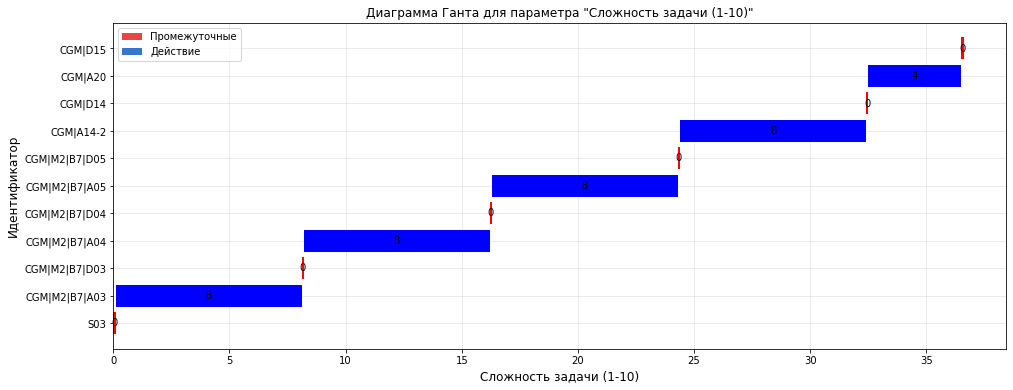

In [6]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, figsize=(16,6));
plt.grid(alpha=0.3, zorder=0);
ax.set_axisbelow(True);

c_dict = {'Промежуточные':'#E64646', 'Действие':'#3475D0'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]

rect = ax.barh(df['Идентификатор'], df['Start-Finish'], left=df['Start'], color=df['Color']);
plt.title('Диаграмма Ганта для параметра "Сложность задачи (1-10)"', fontsize=12)
plt.xlabel('Сложность задачи (1-10)', fontsize=12);
plt.ylabel('Идентификатор', fontsize=12);
plt.legend(handles=legend_elements);

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_width()
        ax.text(rect.get_x() + rect.get_width()/2., (rect.get_y()+0.23),
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(rect)

# plt.savefig('Сложность задачи.png', dpi=200);
plt.show();

In [7]:
import datetime

def convert(number,
            year=datetime.datetime.today().strftime("%m/%d/%Y").split('/')[2],
            month=datetime.datetime.today().strftime("%m/%d/%Y").split('/')[0],
            day=datetime.datetime.today().strftime("%m/%d/%Y").split('/')[1]
            ):
    
    '''
    Конвертирует number (float) в полную дату с точностью до часов
    Пользователь может указать год, месяц, день, иначе назначается сегодняшняя дата
    
    TODO: добавить учет дня, заданный пользоватем
    '''
    
    to_day_hour = number/24  #  выводит float, где день - число перед запятой
    if len(str(to_day_hour).split('.')[0]) > 1:  #  учет если кол-во дней больше 10
        day = str(int(to_day_hour)+1)
    else:
        day = '0'+str(int(to_day_hour)+1)
        
    
    hour = str(int(round(float('.'+str(number/24).split('.')[1])*24, 2)))
    if len(hour)> 2:
        hour = '0'+ hour
        
    hour_to_min = str(round(float('.'+str(number/24).split('.')[1])*24, 5))
    minute = str(int(round(float('.'+hour_to_min.split('.')[1])*60, 2)))
    
    return pd.to_datetime(month+'/'+day+'/'+year+' '+hour+':'+minute, format='%m/%d/%Y %H:%M')


df['Start Date'] = df['Start'].to_frame().applymap(convert)
df['Finish Date'] = df['Finish'].to_frame().applymap(convert)
df

,Тип данных,Идентификатор,Сложность задачи (1-10),Start,Finish,Start-Finish,Color,Start Date,Finish Date
0,Промежуточные,S03,0.1,0.0,0.1,0.1,Red,2022-05-01 00:00:00,2022-05-01 00:06:00
1,Действие,CGM|M2|B7|A03,8.0,0.1,8.1,8.0,Blue,2022-05-01 00:06:00,2022-05-01 08:06:00
2,Промежуточные,CGM|M2|B7|D03,0.1,8.1,8.2,0.1,Red,2022-05-01 08:06:00,2022-05-01 08:12:00
3,Действие,CGM|M2|B7|A04,8.0,8.2,16.2,8.0,Blue,2022-05-01 08:12:00,2022-05-01 16:12:00
4,Промежуточные,CGM|M2|B7|D04,0.1,16.2,16.3,0.1,Red,2022-05-01 16:12:00,2022-05-01 16:18:00
5,Действие,CGM|M2|B7|A05,8.0,16.3,24.3,8.0,Blue,2022-05-01 16:18:00,2022-05-02 00:18:00
6,Промежуточные,CGM|M2|B7|D05,0.1,24.3,24.4,0.1,Red,2022-05-02 00:18:00,2022-05-02 00:24:00
7,Действие,CGM|A14-2,8.0,24.4,32.4,8.0,Blue,2022-05-02 00:24:00,2022-05-02 08:24:00
8,Промежуточные,CGM|D14,0.1,32.4,32.5,0.1,Red,2022-05-02 08:24:00,2022-05-02 08:30:00
9,Действие,CGM|А20,4.0,32.5,36.5,4.0,Blue,2022-05-02 08:30:00,2022-05-02 12:30:00


In [8]:
df['Идентификатор'].tolist()

['S03',
 'CGM|M2|B7|A03',
 'CGM|M2|B7|D03',
 'CGM|M2|B7|A04',
 'CGM|M2|B7|D04',
 'CGM|M2|B7|A05',
 'CGM|M2|B7|D05',
 'CGM|A14-2',
 'CGM|D14',
 'CGM|А20',
 'CGM|D15']

In [20]:
import plotly.express as px



fig = px.timeline(df, x_start="Start Date", x_end="Finish Date", y="Идентификатор",
#                   color="Тип данных",
#                   category_orders=dict(group=df['Идентификатор'].tolist()),
                 )
# fig.update_layout(yaxis_categoryorder = 'total ascending')
fig.update_yaxes(autorange="reversed")